# Classifying Fashion-MNIST


Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Trainset have 60,000 images and testset have 10,000 images. Let's check:

In [3]:
# Get one batch
images, labels = next(iter(trainloader))
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


**Visualization**

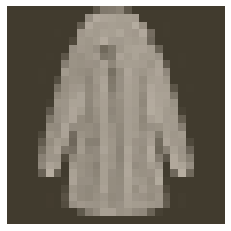

In [4]:
import helper
helper.imshow(images[0])

**Some observation**


In [5]:
# 60,0000/64
len(trainloader)

938

In [6]:
# transform [61, 1, 28, 28] into [64, 1x28x28]
festures = images.view(images.shape[0], -1) # images.view(64, -1)
festures.shape

torch.Size([64, 784])

## Neural Network Arquiecture

In [7]:
import torch.nn.functional as F
from torch import nn

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        
    def forward(self, x):
        
        # Flatten images
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)  
        
        return x

In [8]:
model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

## Training the Network

In [9]:
from torch import optim

criterion = nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

In [10]:
epochs = 5

for epoch in range(epochs):
    train_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad() # clear the gradients, do this because gradients are accumulated
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward() #activate gradients
        optimizer.step() # update new weights
        train_loss += loss.item()
        
    print('Epoch: {} Train loss: {}' .format(epoch + 1, train_loss/len(trainloader)))

Epoch: 1 Train loss: 0.5212625833843817
Epoch: 2 Train loss: 0.38993671572983646
Epoch: 3 Train loss: 0.35915641125235986
Epoch: 4 Train loss: 0.33325360997367515
Epoch: 5 Train loss: 0.31652371256924006


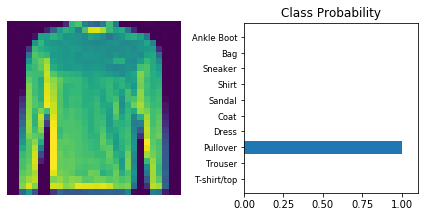

In [11]:
# Test the network
img = images[0]

with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version ='Fashion')

## Testing and Inference 

In [12]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30 

train_losses, test_losses = [], []
for epoch in range(epochs):
    train_loss = 0
    
    # Train
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
      
    else:
        test_loss = 0
        accuracy = 0
           
        # Test
        with torch.no_grad():
            for images, labels in testloader:
                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()
                
                ps = torch.exp(logps)
                _, top_class = ps.topk(1, dim=1)
                equals = top_class.squeeze() == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{} ".format(epoch+1, epochs),
              "Training Loss: {:.3f} ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f} ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30  Training Loss: 0.518  Test Loss: 0.433  Test Accuracy: 0.844
Epoch: 2/30  Training Loss: 0.390  Test Loss: 0.459  Test Accuracy: 0.832
Epoch: 3/30  Training Loss: 0.354  Test Loss: 0.403  Test Accuracy: 0.853
Epoch: 4/30  Training Loss: 0.334  Test Loss: 0.422  Test Accuracy: 0.848
Epoch: 5/30  Training Loss: 0.319  Test Loss: 0.369  Test Accuracy: 0.872
Epoch: 6/30  Training Loss: 0.304  Test Loss: 0.386  Test Accuracy: 0.871
Epoch: 7/30  Training Loss: 0.292  Test Loss: 0.361  Test Accuracy: 0.878
Epoch: 8/30  Training Loss: 0.278  Test Loss: 0.382  Test Accuracy: 0.870
Epoch: 9/30  Training Loss: 0.272  Test Loss: 0.369  Test Accuracy: 0.873
Epoch: 10/30  Training Loss: 0.269  Test Loss: 0.362  Test Accuracy: 0.878
Epoch: 11/30  Training Loss: 0.260  Test Loss: 0.362  Test Accuracy: 0.877
Epoch: 12/30  Training Loss: 0.255  Test Loss: 0.364  Test Accuracy: 0.876
Epoch: 13/30  Training Loss: 0.248  Test Loss: 0.377  Test Accuracy: 0.877
Epoch: 14/30  Training Loss: 0.238

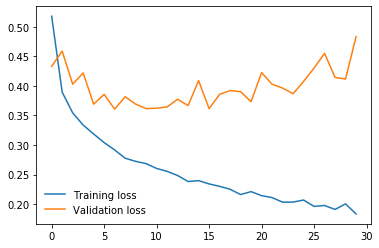

In [13]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend(frameon=False)
plt.show()

### Inference

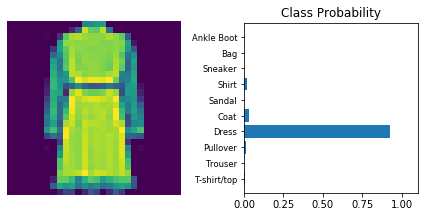

In [14]:
img = images[1]
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version ='Fashion')

## Overfitting

The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing. 

The most common method to reduce overfitting (outside of early-stopping) is *dropout*, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new data.

### Dropout

In [15]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
        
    def forward(self, x):
        
        # Flatten images
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)  
        
        return x
    

**Training and testing**

In [16]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30 

train_losses, test_losses = [], []
for epoch in range(epochs):
    train_loss = 0
    
    # Train
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
      
    else:
        test_loss = 0
        accuracy = 0
           
        # Test
        with torch.no_grad():
            model.eval()  # turn off dropout during testing
            for images, labels in testloader:
                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()
                
                ps = torch.exp(logps)
                _, top_class = ps.topk(1, dim=1)
                equals = top_class.squeeze() == labels
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        
        # set model back to train mode
        model.train()
                
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{} ".format(epoch+1, epochs),
              "Training Loss: {:.3f} ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f} ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30  Training Loss: 0.605  Test Loss: 0.464  Test Accuracy: 0.833
Epoch: 2/30  Training Loss: 0.479  Test Loss: 0.428  Test Accuracy: 0.847
Epoch: 3/30  Training Loss: 0.453  Test Loss: 0.438  Test Accuracy: 0.850
Epoch: 4/30  Training Loss: 0.431  Test Loss: 0.406  Test Accuracy: 0.855
Epoch: 5/30  Training Loss: 0.419  Test Loss: 0.420  Test Accuracy: 0.854
Epoch: 6/30  Training Loss: 0.407  Test Loss: 0.396  Test Accuracy: 0.861
Epoch: 7/30  Training Loss: 0.402  Test Loss: 0.386  Test Accuracy: 0.862
Epoch: 8/30  Training Loss: 0.400  Test Loss: 0.389  Test Accuracy: 0.861
Epoch: 9/30  Training Loss: 0.389  Test Loss: 0.389  Test Accuracy: 0.860
Epoch: 10/30  Training Loss: 0.388  Test Loss: 0.397  Test Accuracy: 0.861
Epoch: 11/30  Training Loss: 0.391  Test Loss: 0.399  Test Accuracy: 0.863
Epoch: 12/30  Training Loss: 0.376  Test Loss: 0.376  Test Accuracy: 0.865
Epoch: 13/30  Training Loss: 0.372  Test Loss: 0.395  Test Accuracy: 0.860
Epoch: 14/30  Training Loss: 0.372

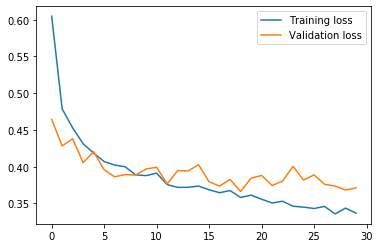

In [17]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(test_losses, label = 'Validation loss')
plt.legend()
plt.show()

### Inference

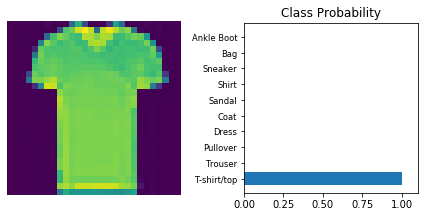

In [18]:
model.eval()
img = images[1]
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version ='Fashion')